*Sweatpy* has built-in classes and functions for critical power modelling (or *power duration modelling* in more general terms).

## Critical power model fitting

Sweatpy has a `CriticalPowerRegressor` class that helps you fit power data to a critical power ("cp") model.
The supported models are:

- 2 parameter critical power model. Parameters: CP and W'.
- 3 parameter critical power model. Parameters: CP, W' and P<sub>max</sub>.

The `CriticalPowerRegressor` follows the [sklearn API guidelines](https://scikit-learn.org/stable/developers/develop.html) for estimators/regressors to provide a familiar interface for data scientists.

Usage:

In [8]:
import numpy as np
import sweat

durations = [5, 60, 300, 1200] # Durations in seconds
power = [1300, 600, 330, 290]
# Like all sklearn estimators, the regressor expects a 2 dimensional array of features
X = sweat.array_1d_to_2d(durations)
y = power

cpreg = sweat.CriticalPowerRegressor()  # By default the 2 parameter model is used
cpreg.fit(X, y);

/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


The fitted parametes are then available as attributes on the regressor:

In [10]:
print(f"CP: {cpreg.cp_}")
print(f"W': {cpreg.w_prime_}")

CP: 370.2118107361753
W': 4705.597395915472


To predict power for specific durations using the fitted model:

In [12]:
# Again, the regressor expects a 2 dimensional array of features.
X = sweat.array_1d_to_2d([30, 600, 3600])

print(f"Predicted power values: {cpreg.predict(X)}")

Predicted power values: [527.06505727 378.05447306 371.51892112]


3 parameter model usage:

In [13]:
import numpy as np
import sweat

# Durations in seconds
durations = [5., 60., 300., 1200.]
power = [1300., 600., 330., 290.]

# Like all sklearn estimators, the regressor expects a 2 dimensional array of features.
X = sweat.array_1d_to_2d(durations)


y = power

cpreg = sweat.CriticalPowerRegressor(model="3 param")
cpreg.fit(X, y)

print(f"CP: {cpreg.cp_}")
print(f"W': {cpreg.w_prime_}")
print(f"P_max: {cpreg.p_max_}")

# Durations in seconds
durations = [30, 600, 3600]
# Again, the regressor expects a 2 dimensional array of features.
X = sweat.array_1d_to_2d(durations)

print(f"Predicted power values: {cpreg.predict(X)}")

CP: 257.3956711062305
W': 27622.25611757151
P_max: 1542.9905901539807
Predicted power values: [793.89629791 301.84117329 265.02299766]


## W'<sub>balance</sub>

When the model coefficients `CP` and `W'` of the 2 parameter cp model (see above) are known, you can model the W'<sub>balance</sub>.

Usage:

In [19]:
import pandas as pd
import sweat

# First create an artificial workout
artificial_power = 60*[100] + 60*[400] + 30*[100] + 60*[400] + 60*[100]
datetime = pd.to_datetime(list(range(len(artificial_power))), unit="s")
data = pd.DataFrame(dict(power=artificial_power), index=datetime)

# Define the model coefficients
cp = 300
w_prime = 20000

data["W'balance"] = sweat.w_prime_balance(data["power"], cp=cp, w_prime=w_prime).to_list()

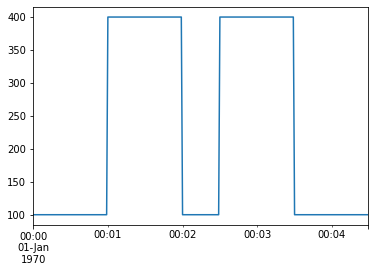

In [24]:
data["power"].plot();

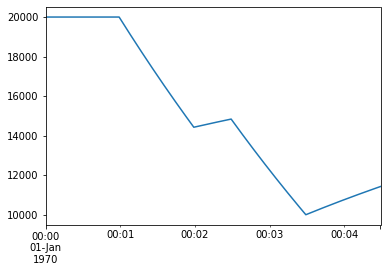

In [27]:
data["W'balance"].plot();

By default, the Waterworth implementation of the Skiba algorithm is used. The list of available algorithms is:

- waterworth
- skiba
- froncioni-skiba-clarke

For a comparison of W'<sub>balance</sub> algorithms, read [this blog post](https://gssns.io/posts/comparison-of-wbalance-algorithms.html).

To use a different algorithm than the default, pass the name of the algorithm to the `sweat.w_prime_balance()` function.

Usage:

In [ ]:
sweat.w_prime_balance(
    power=data["power"],
    cp=cp,
    w_prime=w_prime,
    algorithm="froncioni-skiba-clarke")